# Machine Learning 
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

There will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))


/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Boston housing dataset has 489 data points with 4 variables each.


/opt/conda/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [2]:
#Minimum price of the data
minimum_price = np.min(prices)

#Maximum price of the data
maximum_price = np.max(prices)

#Mean price of the data
mean_price = np.mean(prices)

#Median price of the data
median_price = np.median(prices)

#Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105000.0
Maximum price: $1024800.0
Mean price: $454342.9447852761
Median price $438900.0
Standard deviation of prices: $165171.13154429474


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


** Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each.**


* Would you expect a home that has an `'RM'` value(number of rooms) of 6 be worth more or less than a home that has an `'RM'` value of 7?
* Would you expect a neighborhood that has an `'LSTAT'` value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an `'LSTAT'` value of 20?
* Would you expect a neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an `'PTRATIO'` value of 15?

**Answer: **

**RM Feature** : Increase in number of rooms in a home will increase the worth of a home since people would prefer more rooms for their families, also if a house has more number of rooms it might be a apartment.

**LSTAT Feature** : The percent of lower class workers in a neighbourhood would suggest that the house in the neighbourhood costs less and thats why lower class workers are able to afford them. So more the LSTAT value the less value of a homes in the neighbourhood.

**PTRATIO Feature** : Similar to ratio of students to teachers if the number of students are more in a neighbourhood it might suggest there is less value among the neighbourhood since students are not salaried people in a neighbourhood. The more the amount of teachers might suggest more value in the neighbourhood since teachers are salaried and also are paid more. 

Here, we see a correlation between price and each of our variable under study, since as we are considering linear correlation and the data to be normally distributed we are describing Pearsons correlation.

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [3]:
# Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [4]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


* Would you consider this model to have successfully captured the variation of the target variable? 
* Why or why not?

**Answer:** Yes, we would consider this model to have successfully captured the variation between predicted and true target values. Since the R squared value is around 0.92 which is a good score we can say the correlation is good.

To understand the question of why this model has successfully captured the variation, we will need to look at how r2 score is calculated. When we take a linear regression model and fit it to our data, it gives a regression line which helps to predict the response variable for any explanatory variable, but is this prediction better than a simple horizontal line drawn  with the mean of our data points as intercept on the vertical axis?

To evaluate this we take the sum of squares of the residual over the sum of squares of the total variation and subtract the output by 1. If the sum of squares of our residual is near the total variation then our score becomes very less and there is no point in using our regression line to predict the response.  If the sum of squares of our residual is far from and low than the total variation then our score becomes very high and our regression line  can be used to predict the response.  

sum of squares of residual = $\sum (\hat{y} - y_i)^2$<br>
sum of squares of total variation = $\sum (\bar{y} - y_i)^2$<br><br>
$r^2$  = 1 - $\frac{\sum (\hat{y} - y_i)^2}{\sum (\bar{y} - y_i)^2}$



### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [5]:
#Import 'train_test_split'
from sklearn.model_selection import train_test_split 
#Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.20, shuffle = True, random_state = 42)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


### Question 3 - Training and Testing

* What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?


**Answer: ** When we split the data into training and testing subsets, we are able to evaluate our machine learning model with various metrics such as the precision, recall and accuracy rate. We are able to evaluate if our model underfits or overfits with the learning curve methods that we studied. We can also tune our model with cross validation methods for which we need another subset too which acts similar to testing our model.

In conclusion without testing data we will not be able to evaluate and convey if our model is good or bad which is something that is really important.

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

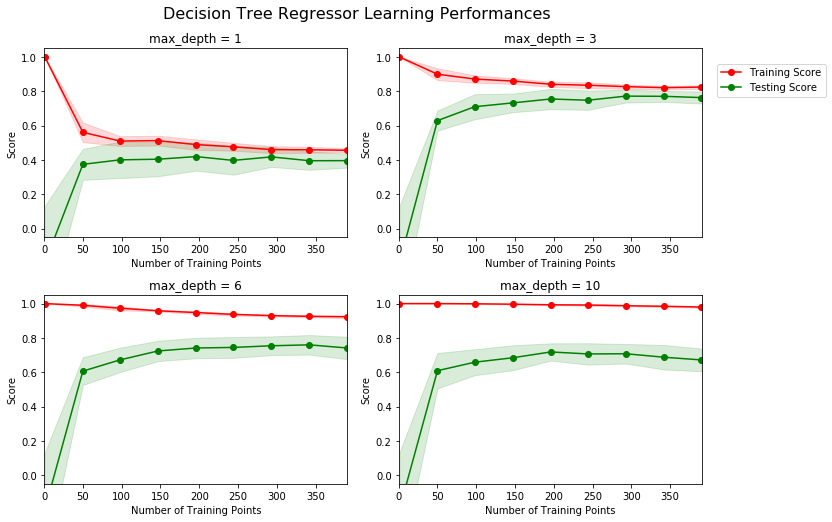

In [6]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
* Choose one of the graphs above and state the maximum depth for the model. 
* What happens to the score of the training curve as more training points are added? What about the testing curve? 
* Would having more training points benefit the model? 


**Answer: ** 
* the graph with max_depth of 1 we are able to see initially when incrementing the data points for the training and testing data there is a sharp fall in the score for training data and a sharp increase in the testing data but after reaching limit where the scores are almost close the change in the line is minimal. This graph shows that the score remains constant without much deviations. Since the score is also sub par we can see this is an underfitted model.

* On adding more training points to our graph, the training curve may have variations but there **cannot** be a very significant change in our curve. After a certain limit they continue to show a constant trend. More training points thus **will not benefit the curve** in anyway.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  


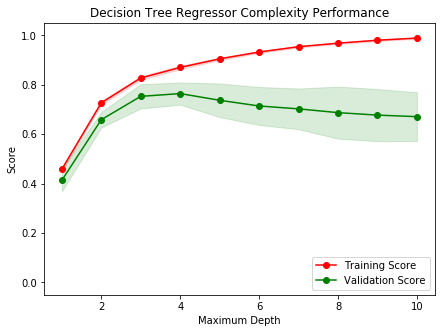

In [7]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
* When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? 
* How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?



**Answer: ** 
* When the model is training with a maximum **depth of 1, the model suffers from high bias/underfitting**. The score as seen from complexity score shows that training data and cross validation data has more errors which is reflected by the score.

* When the model is trained with a maximum **depth of 10, the model suffers from high variance/overfitting**. From the complexity graph we are able to see eventhough no errors are obtained from the training data the errors obtained from the cross validation data is more which is reflected by the low score of the cross validation data in the complexity graph.

* If our model suffers from high bias we may consider to increase the maximum depth for this model. In the case of high variance we may choose to decrease the maximum depth value.

### Question 6 - Best-Guess Optimal Model
* Which maximum depth do you think results in a model that best generalizes to unseen data? 
* What intuition lead you to this answer?



**Answer: ** From the complexity graph, we are able to see as the maximum depth increases the score improves for training data but the score for cross validation increases intially but decreases at higher depth degrees. From the graph we are able to see we are able to get the **best estimated model at a maximum depth of 4.** Here we are able to get the best cross validation data score. The training data score might not be the best at this depth of 4 but we are able to get the best cross validation score which is a good trade off.

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
* What is the grid search technique?
* How it can be applied to optimize a learning algorithm?



**Answer: ** 
* The grid search technique helps in taking a user specified model and a list of parameter and hyperparameter values related to the model, it then finds the **best f1 score from each parameter combination and returns the user the best model fit.** 

* The functionalities of Gridsearch can be manually done by the user but it involves a lot of effort and also human errors can happen. 

**For example,** if we take a decision tree model, we can evaluate the model on various parameters such as maximum depth, minimum sample leaf and minimum sample leaf splits and finally calculate the score of the model. If we need to calculate the score on various parameter values to find the best fit we may need to manually evaluate each model parameter or combination of parameters. This is where grid search comes in handy. It allows the user to evaluate in an efficient manner by just inputting the parameters we require on the model. The grid search evaluates the model on various combinations for the parameters we passed and returns the best fit for the model.


### Question 8 - Cross-Validation

* What is the k-fold cross-validation training technique? 

* What benefit does this technique provide for grid search when optimizing a model?

**Hint:** When explaining the k-fold cross validation technique, be sure to touch upon what 'k' is, how the dataset is split into different parts for training and testing and the number of times it is run based on the 'k' value.

When thinking about how k-fold cross validation helps grid search, think about the main drawbacks of grid search which are hinged upon **using a particular subset of data for training or testing** and how k-fold cv could help alleviate that. You can refer to the [docs](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) for your answer.

**Answer: ** 
* When we are training our model with the training data we might sometimes be loosing some valuable data points for our model that are not available along with our training data but is available with our testing data. This sometimes breaks our model. When this happens we manually tune our model by changing the hyperparameters. This will inturn give us a good score, but there is a very good chance we are overfitting our model. To tackle this we create another segement within our dataset called the **validation set** and tune our model based on the validation set and finally test it with our tesing set.

* The **disadvantage** here is we are **creating more segements thereby decrementing our training data and our model** has the tendency to break by underfitting. This is where the k fold cross validation technique comes in.

* The **kfold cross validation helps in creating segements or buckets of data** based on the number of fold/segements required by the user to the kfold function which is manually entered by the user. The data is splitted into k segements (k is which user inputs) and also the user specifies the number of testing data points for each segement/bucket. The model used in the Grid Search is **trained on k-1 folds** of the splitted data and **tested on the final fold/segement of data.** This tackles our previous problem as it does not decrement the total training data we have in hand. It also tackles underfitting or overfitting  our model in Grid Search.

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

Please note that ShuffleSplit has different parameters in scikit-learn versions 0.17 and 0.18.
For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [8]:
# Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':list(range(1,11))}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(regressor, params, scoring = scoring_fnc, cv = cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model

* What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [9]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)


# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.



**Answer: ** The max_depth returned from our grid search is '4' which is in compliance with the complexity graph seen earlier in which we had also predicted the maximum depth degree to be '4' through visual analysis.

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 

**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  Of the three clients, client 3 has has the biggest house, in the best public school neighborhood with the lowest poverty level; while client 2 has the smallest house, in a neighborhood with a relatively high poverty rate and not the best public schools.

Run the code block below to have your optimized model make predictions for each client's home.

In [10]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $403,025.00
Predicted selling price for Client 2's home: $237,478.72
Predicted selling price for Client 3's home: $931,636.36


**Answer: ** From the prices predicted by our model and the from our previous intuitions made on the prices of the houses, we are able to relate with our justifications.

Number of rooms : Increase in number of rooms is believed to Increase the value of a home.<br>
Poverty level : The increase in neighbourhood poverty level is belived to decrease the value of a home.<br>
Student to Teacher ratio : On increase of Student Teacher ratio it is believed the value of a home decreases.<br>

With this we will analyse our three clients,

**Client 1** : Client 1 has 5 rooms which drastically increases the value of the home. The other factors, poverty level and student teacher ratio pull back its value but only by a small limit. This home is below the mean and median but only by a small range.<br>
    **Recommendation** : We would recommend the client to sell the home at the predicted cost or at the median value.
    
**Client 2** : Client 2's home has 4 rooms available which is just one room less than client 1 but the value is pulled down drastically by the poverty level and student teacher ratio.<br>
    **Recommendation** : We would recommend the client to sell at the predicted rate.
    
**Client 3** : Clent 3's home has a lot of rooms counted at 8. This catapults the value of the home and the other positive thing to note here is the other factors such as low poverty level and low student teacher ratio does not pull down the value by a lot as we saw in client 2's case. <br>
    **Recommendation** : We would recommend the client to sell at the predicted rate or lesser than that but no more than the predicted rate...

As a real estate agent and with my price prediction model, i would know the actual cost of the house that i can sell it for as i have taken various factors into account such neighbourhood poverty level and student teacher ratio, but this is not something that my client will know. The client generally evaluates his/her home based on the number of rooms available and would not bother about the external factors that we used to predict the cost of the home. 

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

**Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.**

In [11]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $424,935.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $73,357.39


### Question 11 - Applicability

* In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.  

**Hint:** Take a look at the range in prices as calculated in the code snippet above. Some questions to answering:
- How relevant today is data that was collected from 1978? How important is inflation?
- Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?
- Is the model robust enough to make consistent predictions?
- Would data collected in an urban city like Boston be applicable in a rural city?
- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

**Answer: ** This model cannot be used for current scenario. If the model is updated with current data then there is a chance it might work out but this will take a lot of effort.

* Our model consists of data collected from 1978, but the time gap is large and this **data will not be relevant to current real world setting.** Yes, we have taken into account inflation but that is not the only factor which we can account as sufficient and predict the prices. The other factors such as poverty level in the neighbourhood and student teacher level would have changed, but even if we update them, there will be new factors which might be far more critical for our evaluation.

* The features given in the dataset **can accomodate more valuable data** such as square feet of the plot area. This is very important since we might sometimes predict a home with more rooms as highly priced but it might be built on a small plot area of an average 4 room house. Presence of pool also increases the value of a home drastically. Other important features we might consider can be furnished/semifurnished/not-furnished, garage, number of floors. There might be other smaller things too such as a garden area, number of shops/supermarkets nearby, etc. **With more relevant features we have the ability to have a good score** to predict the prices.

* From the trial predictions we are able to see the range of values between the minimum and maximum to be arounfd 60k dollars. This is not very good since the **variation is high.**

* In rural areas, the price of the houses are **generally pretty much lower than houses in cities**. The neighbourhoods are also  spread out. Other factors such as student to teacher ratio may not even exist in rural cities since most people come to cities like Boston to study for college. Hence the **Boston Data would not be applicable to rural cities.**

* **Generally people who buy a home, always take a look at the neighbourhood which then if the neighbourhood gives them a positive overview they feel a sense of security within them.** So based on the populations outlook we may judge the neighbourhood for the price. There may be industries near the neighbourhood or it might be a busy neighbourhood which some may prefer others may prefer a calm and serene outlook of their neighbourhood.

